In [137]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [138]:
## 이 챕터로 수행평가 봄

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [139]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/H2MKPB.TTF'
# font_prop = FontProperties(fname=font_path, size=10)
# plt.rc('font', family = font_prop.get_name())

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [140]:
df_first = pd.read_csv('C:/ai/source/01_python/data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding ='cp949')
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [141]:
df_first.shape

(17, 22)

In [142]:
pd.options.display.max_columns # 최대 display 가능한 열수 수정
df_first(1)

TypeError: 'DataFrame' object is not callable

In [143]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [144]:
df_first.isna().sum()  # 열별 결츨치 갯수

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [145]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(3)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343
경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,6767,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665


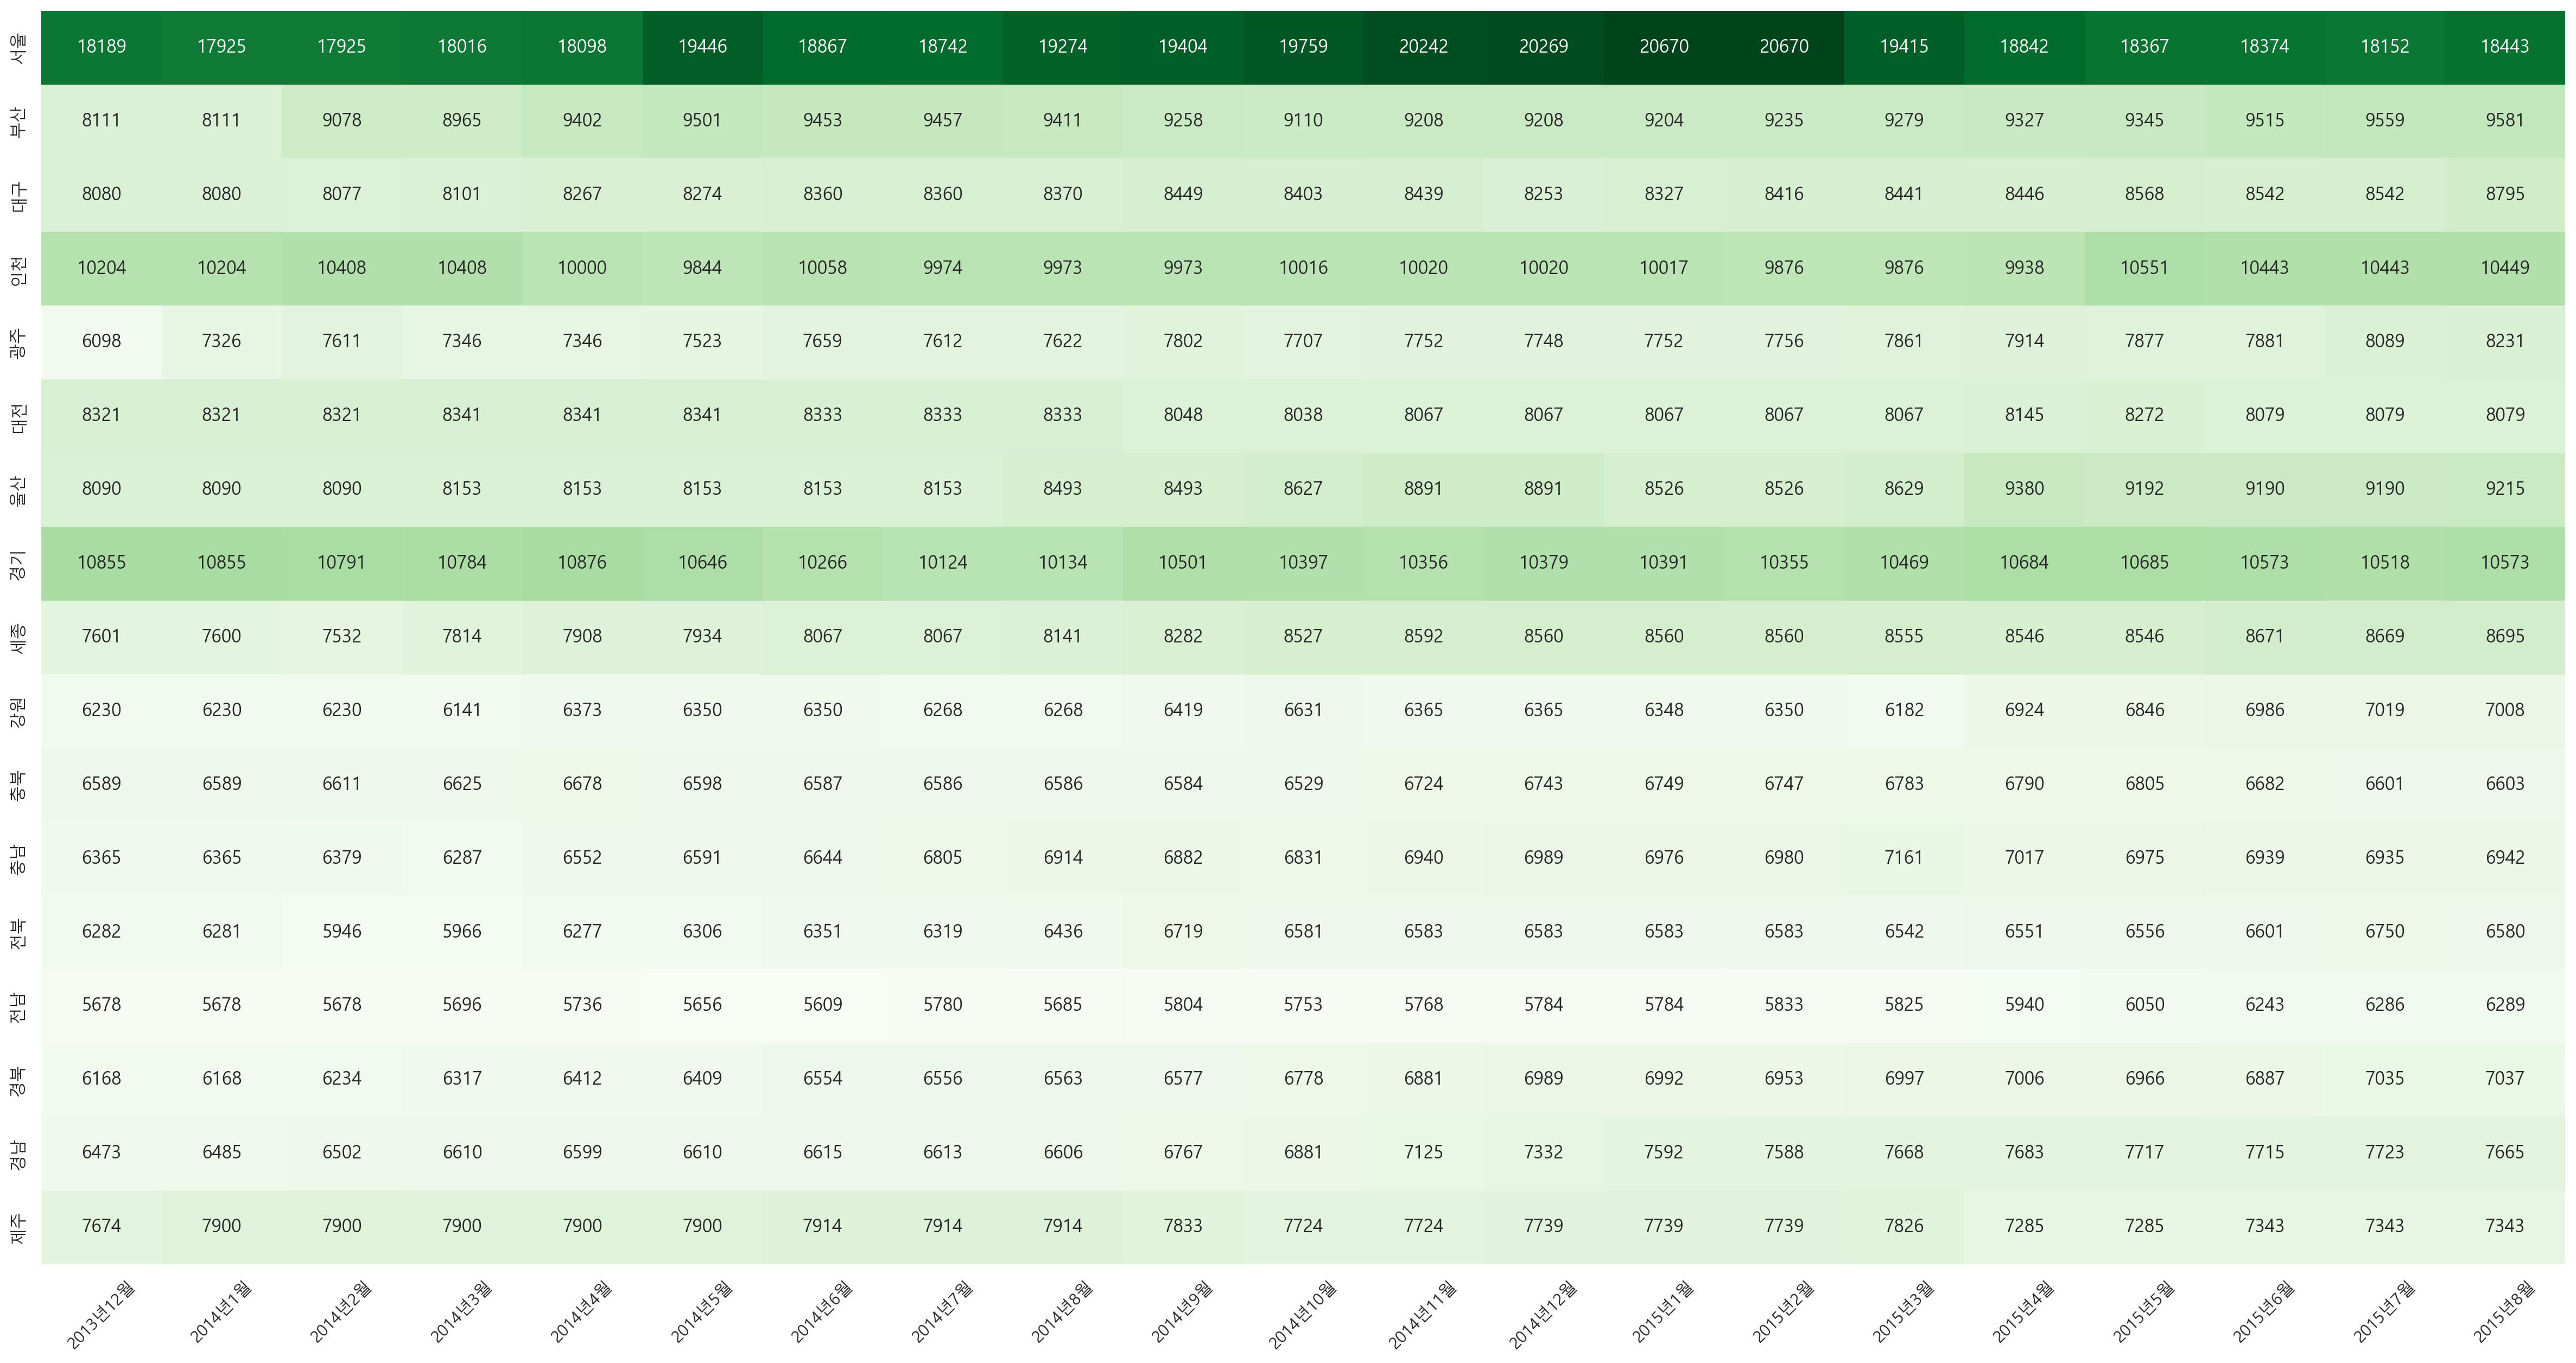

In [146]:
plt.figure(figsize=(30,15))
sns.heatmap(df_first_heat, annot=True, fmt='d',cmap='Greens', cbar=False)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [147]:
df_last = pd.read_csv('C:/ai/source/01_python/data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                      encoding ='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [148]:
# 데이터 요약하기
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [149]:
# 열별 결측치 갯수
df_last.isnull().sum()
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [150]:
# 열별 결측치를 제외한 갯수


In [151]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체 갯수 :', len(df_last['분양가격(제곱미터)']), df_last.shape[0])
print('결측치가 아닌 갯수 :', df_last['분양가격(제곱미터)'].notnull().sum())
print('결측치가 아닌 갯수 :', df_last['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 :', df_last['분양가격(제곱미터)'].isnull().sum())
print('결측치갯수 :', df_last['분양가격(제곱미터)'].isna().sum())

전체 갯수 : 9095 9095
결측치가 아닌 갯수 : 8481
결측치가 아닌 갯수 : 8481
결측치 갯수 : 614
결측치갯수 : 614


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [152]:
df_last.loc[0,'분양가격(제곱미터)']

'5841'

In [153]:
#df_last.groupby('지역명')['분양가격(제곱미터)'].mean() 에러남

#df_last['분양가격(제곱미터)'] * 3.3 에러남

In [154]:
#df_last['분양가격(제곱미터)'].astype('float') #'    ' -> 에러남
pd.to_numeric?
#pd.to_numeric(df_last['분양가격(제곱미터)'])
# 숫자로 변경할 때 예외발생시 예외발생말고 NaN으로
pd.to_numeric(df_last['분양가격(제곱미터)'],
              errors='coerce').isna().sum() # 원래결측치갯수(614)

744

In [155]:
# 분양가격에 space가 있는 경우
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].shape

(126, 5)

In [156]:
# 분양가격에 ,가 있는 경우

In [157]:
df_last[df_last['분양가격(제곱미터)'].notnull() &
    (df_last['분양가격(제곱미터)'].str.find(',') != -1) ]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


In [158]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip() == '', '지역명'].value_counts()

세종    30
제주    19
대구    19
광주    12
전남    11
대전    10
울산    10
전북     8
경남     5
서울     2
Name: 지역명, dtype: int64

### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [159]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [160]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [161]:
df_last.loc[368]

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object

In [162]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123' / '5123' -> 5123)
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    # price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan : 값의 타입에 상관없이 nan인지 여부
        # (2) pd.isna(price), pd.isnull(값) : 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 ㅅ수자가 아닐 경우 에러, 숫자일 경우 nan인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': # space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',')!=-1 : # 콤마(,)가 있으면 ,없애고 float형변환
        pricesplitted = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplitted))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
    
print(commadrop(df_last.loc[80])) # 콤마 제외
print(commadrop(df_last.loc[1])) # 그대로
print(commadrop(df_last.loc[28])) # 공백문자의 경우 nan
print(commadrop(df_last.loc[368])) # nan의 경우 nan

지역명               제주
규모구분            모든면적
연도              2015
월                 10
분양가격(제곱미터)    2232.0
Name: 80, dtype: object
지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)           5652.0
Name: 1, dtype: object
지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2015
월                                  10
분양가격(제곱미터)                        NaN
Name: 28, dtype: object
지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
Name: 368, dtype: object


In [163]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last.apply(commadrop, axis = 1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [164]:
df_last.apply(commadrop, axis = 1).isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    740
dtype: int64

In [165]:
df_last.loc[]

SyntaxError: invalid syntax (3122708328.py, line 1)

### map

In [ ]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [ ]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
#df_last['분양가격(제곱미터)'].map(commadrop2)

### apply나 map사용 안 하기

In [166]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(",",'')).isna().sum()

740

In [167]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(",",''))

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [168]:
# 80(콤마있었던 행), 28(공백문자),368(결측치)
df_last.loc[80]
df_last.loc[28]
df_last.loc[368]
df_last.loc[1]

지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)             5652
Name: 1, dtype: object

In [169]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


In [170]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3

TypeError: can't multiply sequence by non-int of type 'float'

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [ ]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

## (3) 전용면적별 평당분양가격(평균)

## (4) 지역별, 전용면적별 평당분양가격(평균)

## (5) 연도, 지역별 평당분양가격(평균)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

## (2) 지역별 평당분양가격 (line, bar)

## (3) 전용면적별 평당분양가격(barplot)

## (4) 연도별 평균 평당분양가격(line, bar)

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
